# Plotting Percy's movements on Mars
> This notebook maps and charts the daily movements of the Mars Perserverance rover using NASA data processed in `00-combine-daily-waypoints.ipynb`.

#### Load Python tools and Jupyter config

In [19]:
import warnings
import pandas as pd
import jupyter_black
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import altair_stiles as altstiles
import plotly.graph_objects as go

In [2]:
jupyter_black.load()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("stiles")

ThemeRegistry.enable('stiles')

In [3]:
today = pd.Timestamp("today").strftime("%Y%m%d")

---

## Fetch

#### Read the line and point geojson files for charting/mapping

In [10]:
path_gdf = gpd.read_file("data/processed/rover_path_full.geojson")

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    points_gdf = gpd.read_file("data/processed/rover_points_full.geojson")

#### Basic plot

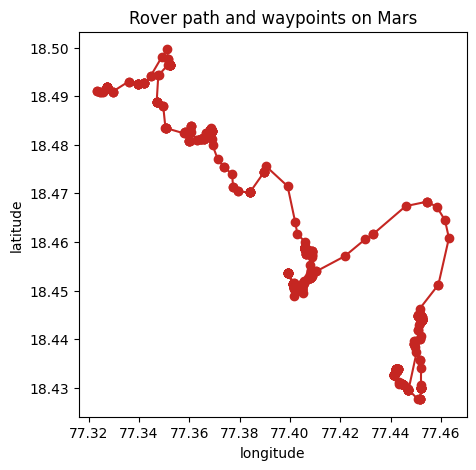

In [30]:
plt.figure(figsize=(5, 5))
plt.scatter(points_gdf.geometry.x, points_gdf.geometry.y, color="#c52622")
plt.plot(points_gdf.geometry.x, points_gdf.geometry.y, color="#c52622")  # Draw paths
plt.title("Rover path and waypoints on Mars")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

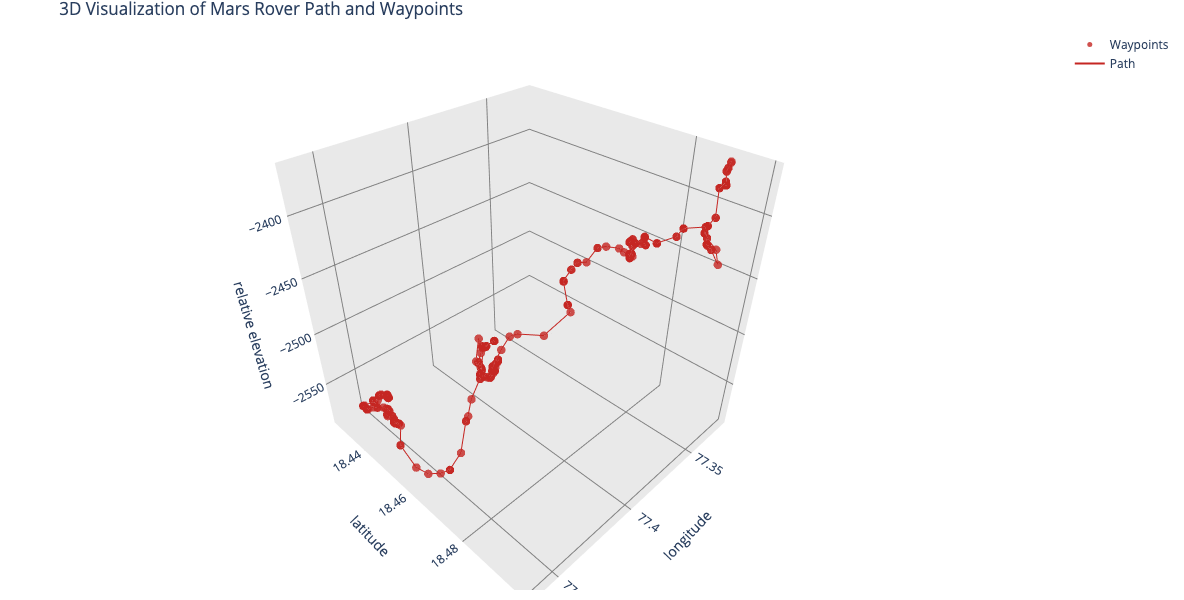

In [32]:
import plotly.graph_objects as go

# Assuming points_gdf is your GeoDataFrame containing the rover's waypoints
# and it includes columns for 'geometry.x' (longitude), 'geometry.y' (latitude),
# and 'elev_geoid' (elevation relative to the Martian geoid)

# Setup for the 3D scatter plot (waypoints)
scatter = go.Scatter3d(
    x=points_gdf.geometry.x,
    y=points_gdf.geometry.y,
    z=points_gdf["elev_geoid"],  # Elevation
    mode="markers",  # Use 'markers' for waypoints, 'lines' for paths, or 'markers+lines' for both
    marker=dict(
        size=5,  # Marker size
        color="#c52622",  # Marker color
        opacity=0.8,  # Marker opacity
    ),
    name="Waypoints",  # Legend entry
)

# Setup for the 3D line plot (path)
line = go.Scatter3d(
    x=points_gdf.geometry.x,
    y=points_gdf.geometry.y,
    z=points_gdf["elev_geoid"],  # Elevation
    mode="lines",
    line=dict(color="#c52622", width=2),  # Line color  # Line width
    name="Path",  # Legend entry
)

# Combining both the scatter and line plots
fig = go.Figure(data=[scatter, line])

# Updating the layout of the figure
fig.update_layout(
    title="3D Visualization of Mars Rover Path and Waypoints",
    scene=dict(
        xaxis_title="longitude",
        yaxis_title="latitude",
        zaxis_title="relative elevation",
        # Customizing the background, grid and axis colors
        xaxis=dict(
            backgroundcolor="#e9e9e9",
            gridcolor="gray",
            showbackground=True,
            zerolinecolor="gray",
        ),
        yaxis=dict(
            backgroundcolor="#e9e9e9",
            gridcolor="gray",
            showbackground=True,
            zerolinecolor="gray",
        ),
        zaxis=dict(
            backgroundcolor="#e9e9e9",
            gridcolor="gray",
            showbackground=True,
            zerolinecolor="gray",
        ),
    ),
    width=800,  # Width of the figure
    height=600,  # Height of the figure
    margin=dict(r=10, l=10, b=10, t=30),  # Margins around the figure
)

# Show the figure
fig.show()

In [ ]:


fig = go.Figure(data=[go.Scatter3d(
    x=points_gdf.geometry.x,
    y=points_gdf.geometry.y,
    z=points_gdf['elev_geoid'],  # Assuming elev_geoid is your elevation data
    mode='markers+lines',
    marker=dict(size=4, color='#c52622'),
    line=dict(color='#c52622'),
)])

fig.update_layout(title='3D Mars Rover Path and Waypoints')
fig.show()

---

## *Elevation*
> The waypoints include a value, in meters, showing the relative elevation of the rover over time. These values are negative, indicating that the rover is exploring areas that are below the surface level — what we might consider "sea level," which obviously isn't applicable to Mars for a variety of reasons. The rober panded in the Jezero Crater's basin, which is of particular scientific interest because it's believed to have once been filled with water and could hold clues to the planet's past potential for harboring life. The negative elevations help scientists and researchers understand the rover's exploration depth within the crater and contribute valuable insights into the Martian geology and topography being studied.

---

## Exports

#### XYXY

#### XYXY